/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


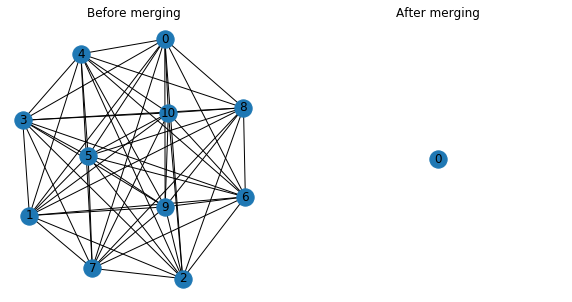

In [102]:
import networkx as nx


with open('temp.txt', 'r') as f:
    lines = f.readlines()

# G = nx.Graph()

nodes = {}
for idx, line in enumerate(lines):
    authors, title, venue = line.split('<>')[1:4]
    authors = set(authors.split(','))
    nodes[idx] = dict(authors = authors, title = (title, ))

G = nx.complete_graph(len(nodes))
nx.set_node_attributes(G, nodes)


def merge_recursive(G, target = 'authors'):
    """
    Keeps merging if there is overlap between nodes
    """
    # check edges
    while G.edges():
        for (i, j) in G.edges():
            overlap = G.nodes()[i][target].intersection(G.nodes()[j][target])
            # copy values
            if overlap:
                tmp = {}
                for k, v in G.nodes()[i].items():
                    if isinstance(v, set):
                        tmp[k] = v.union(G.nodes()[j][k])
                    else:
                        tmp[k] = v + G.nodes()[j][k]

                nx.set_node_attributes(G, {i: tmp})
                G.remove_node(j)
            # no overlap remove edge
            else:
                G.remove_edge(i, j)
            break
    return G

merged = merge_recursive(G.copy())

from matplotlib.pyplot import subplots

fig, (left, right) = subplots(1, 2, figsize = (10,  5))
nx.draw(G, ax = left, with_labels = 1)
nx.draw(merged, ax = right, with_labels = 1)

left.set_title('Before merging')
right.set_title('After merging')
fig.show()
